# 导入相关库

In [5]:
import numpy as np
# from matplotlib import pyplot as plt
#%matplotlib inline

In [6]:
from sklearn import svm

In [7]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

In [8]:
from keras.applications.mobilenet import MobileNet
from keras.applications.mobilenet import preprocess_input

# 读取VGG16预训练模型参数

In [ ]:
model_vgg16 = VGG16(weights='imagenet', include_top=False)

In [ ]:
model_vgg16 = MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# 读取训练集图片计算特征

In [ ]:
training_set_vgg16_features = []
for i in list(range(1, 401)) + list(range(501, 901)):
    img_path = 'test8/%06d.png' % i
    # print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))# 读取图片
    
    #plt.imshow(img)
    #plt.show()# 显示图片
    x = image.img_to_array(img)# 图片转换为ndarray
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)# 数组转换为vgg16输入格式

    training_set_vgg16_features.append(model_vgg16.predict(x).reshape((7*7*512, )))# 计算该张图片的特征

In [ ]:
training_set_vgg16_features_ndarray = np.vstack(training_set_vgg16_features)# 转换为ndarray

In [ ]:
training_set_label = np.array([1.0 if i < 400 else 0.0 for i in range(800)])

# 读取测试集图片计算特征

In [ ]:
test_set_vgg16_features = []
for i in list(range(401, 501)) + list(range(901, 1001)):
    img_path = 'test8/%06d.png' % i
    # print(img_path)
    img = image.load_img(img_path, target_size=(224, 224))# 读取图片
    #plt.imshow(img)
    #plt.show()# 显示图片
    x = image.img_to_array(img)# 图片转换为ndarray
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)# 数组转换为vgg16输入格式

    test_set_vgg16_features.append(model_vgg16.predict(x).reshape((7*7*512, )))# 计算该张图片的特征

In [ ]:
test_set_vgg16_features_ndarray = np.vstack(test_set_vgg16_features)# 转换为ndarray

# VGG16+SVM

### 定义SVM

In [ ]:
clf_vgg = svm.SVC()

### 训练SVM

In [ ]:
clf_vgg.fit(training_set_vgg16_features_ndarray, training_set_label)

### 计算SVM在训练集上的预测值

In [ ]:
training_set_vgg16_with_svm_prediction = clf_vgg.predict(training_set_vgg16_features_ndarray)

In [ ]:
training_set_vgg16_with_svm_prediction[training_set_vgg16_with_svm_prediction >= 0.5] = 1
training_set_vgg16_with_svm_prediction[training_set_vgg16_with_svm_prediction < 0.5] = 0

In [ ]:
training_set_vgg16_with_svm_prediction_positive = training_set_vgg16_with_svm_prediction[: 400]
training_set_vgg16_with_svm_prediction_negative = training_set_vgg16_with_svm_prediction[400:]

### 计算训练集准确率

In [ ]:
print('VGG16+SVM Training Set Confusion Matrix\n          Ture      False')

print('Positive： {0}        {1}'.format(
    len(training_set_vgg16_with_svm_prediction_positive[training_set_vgg16_with_svm_prediction_positive == 1]),len(training_set_vgg16_with_svm_prediction_positive[training_set_vgg16_with_svm_prediction_positive == 0])))
print('Negative： {0}        {1}'.format(
    len(training_set_vgg16_with_svm_prediction_negative[training_set_vgg16_with_svm_prediction_negative == 0]),len(training_set_vgg16_with_svm_prediction_negative[training_set_vgg16_with_svm_prediction_negative == 1])))
print('检测率: {0}, 虚警率: {1}'.format(
    (len(training_set_vgg16_with_svm_prediction_positive[training_set_vgg16_with_svm_prediction_positive == 1]) + 0.0) / len(training_set_vgg16_with_svm_prediction_positive),
    (len(training_set_vgg16_with_svm_prediction_negative[training_set_vgg16_with_svm_prediction_negative == 1]) + 0.0) / len(training_set_vgg16_with_svm_prediction_negative)
))

### 计算SVM在测试集上的预测值

In [ ]:
test_set_vgg16_with_svm_prediction = clf_vgg.predict(test_set_vgg16_features_ndarray)

In [ ]:
test_set_vgg16_with_svm_prediction[test_set_vgg16_with_svm_prediction >= 0.5] = 1
test_set_vgg16_with_svm_prediction[test_set_vgg16_with_svm_prediction < 0.5] = 0
test_set_vgg16_with_svm_prediction_positive = test_set_vgg16_with_svm_prediction[: 100]
test_set_vgg16_with_svm_prediction_negative = test_set_vgg16_with_svm_prediction[100:]

### 计算测试集准确率

In [ ]:
print('VGG16+SVM test Set Confusion Matrix\n          Ture      False')

print('Positive： {0}        {1}'.format(
    len(test_set_vgg16_with_svm_prediction_positive[test_set_vgg16_with_svm_prediction_positive == 1]),len(test_set_vgg16_with_svm_prediction_positive[test_set_vgg16_with_svm_prediction_positive == 0])))
print('Negative： {0}        {1}'.format(
    len(test_set_vgg16_with_svm_prediction_negative[test_set_vgg16_with_svm_prediction_negative == 0]),len(test_set_vgg16_with_svm_prediction_negative[test_set_vgg16_with_svm_prediction_negative == 1])))
print('检测率: {0}, 虚警率: {1}'.format(
    (len(test_set_vgg16_with_svm_prediction_positive[test_set_vgg16_with_svm_prediction_positive == 1]) + 0.0) / len(test_set_vgg16_with_svm_prediction_positive),
    (len(test_set_vgg16_with_svm_prediction_negative[test_set_vgg16_with_svm_prediction_negative == 1]) + 0.0) / len(test_set_vgg16_with_svm_prediction_negative)
))

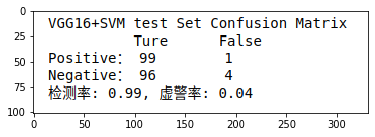

In [11]:
import matplotlib.pyplot as plt
import skimage.io as io
img = io.imread('result/vgg16_svm_test.png') 
plt.imshow(img)
plt.show()

# 全连接神经网络

### 导入相关库

In [ ]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense

### 定义全连接神经网络

In [ ]:
model_smoke_detector = Sequential()
model_smoke_detector.add(Dense(1024, activation='sigmoid', input_shape=(7*7*512, )))# 加入全连接层
model_smoke_detector.add(Dropout(0.5))# 加入dropout防止过拟合
model_smoke_detector.add(Dense(128, activation='sigmoid'))# 加入全连接层
model_smoke_detector.add(Dropout(0.5))# 加入dropout防止过拟合
model_smoke_detector.add(Dense(1, activation='sigmoid'))# 加入全连接层

In [ ]:
model_smoke_detector.compile(optimizer='adam',
                             loss='binary_crossentropy',
                             metrics=['accuracy'])
# 定义神经网络损失函数等

In [ ]:
model_smoke_detector.fit(training_set_vgg16_features_ndarray, training_set_label, nb_epoch=10, batch_size=16)
# 拟合数据即训练神经网络

In [ ]:
test_set_vgg16_with_fc_prediction = model_smoke_detector.predict(test_set_vgg16_features_ndarray)# 对测试集进行预测

In [ ]:
training_set_vgg16_with_fc_prediction = model_smoke_detector.predict(training_set_vgg16_features_ndarray)# 对测试集进行预测

In [ ]:
test_set_vgg16_with_fc_prediction[test_set_vgg16_with_fc_prediction >= 0.5] = 1
test_set_vgg16_with_fc_prediction[test_set_vgg16_with_fc_prediction < 0.5] = 0
test_set_vgg16_with_fc_prediction_positive = test_set_vgg16_with_fc_prediction[:100]
test_set_vgg16_with_fc_prediction_negative = test_set_vgg16_with_fc_prediction[100:]

In [ ]:
training_set_vgg16_with_fc_prediction[training_set_vgg16_with_fc_prediction >= 0.5] = 1
training_set_vgg16_with_fc_prediction[training_set_vgg16_with_fc_prediction < 0.5] = 0
training_set_vgg16_with_fc_prediction_positive = training_set_vgg16_with_fc_prediction[:400]
training_set_vgg16_with_fc_prediction_negative = training_set_vgg16_with_fc_prediction[400:]

In [ ]:
print('VGG16+FC Training Set Confusion Matrix\n          Ture      False')

print('Positive： {0}        {1}'.format(
    len(training_set_vgg16_with_fc_prediction_positive[training_set_vgg16_with_fc_prediction_positive == 1]),len(training_set_vgg16_with_fc_prediction_positive[training_set_vgg16_with_fc_prediction_positive == 0])))
print('Negative： {0}        {1}'.format(
    len(training_set_vgg16_with_fc_prediction_negative[training_set_vgg16_with_fc_prediction_negative == 0]),len(training_set_vgg16_with_fc_prediction_negative[training_set_vgg16_with_fc_prediction_negative == 1])))
print('检测率: {0}, 虚警率: {1}'.format(
    (len(training_set_vgg16_with_fc_prediction_positive[training_set_vgg16_with_fc_prediction_positive == 1]) + 0.0) / len(training_set_vgg16_with_fc_prediction_positive),
    (len(training_set_vgg16_with_fc_prediction_negative[training_set_vgg16_with_fc_prediction_negative == 1]) + 0.0) / len(training_set_vgg16_with_fc_prediction_negative)
))

In [ ]:
print('VGG16+FC test Set Confusion Matrix\n          Ture      False')

print('Positive： {0}        {1}'.format(
    len(test_set_vgg16_with_fc_prediction_positive[test_set_vgg16_with_fc_prediction_positive == 1]),len(test_set_vgg16_with_fc_prediction_positive[test_set_vgg16_with_fc_prediction_positive == 0])))
print('Negative： {0}        {1}'.format(
    len(test_set_vgg16_with_fc_prediction_negative[test_set_vgg16_with_fc_prediction_negative == 0]),len(test_set_vgg16_with_fc_prediction_negative[test_set_vgg16_with_fc_prediction_negative == 1])))
print('检测率: {0}, 虚警率: {1}'.format(
    (len(test_set_vgg16_with_fc_prediction_positive[test_set_vgg16_with_fc_prediction_positive == 1]) + 0.0) / len(test_set_vgg16_with_fc_prediction_positive),
    (len(test_set_vgg16_with_fc_prediction_negative[test_set_vgg16_with_fc_prediction_negative == 1]) + 0.0) / len(test_set_vgg16_with_fc_prediction_negative)
))

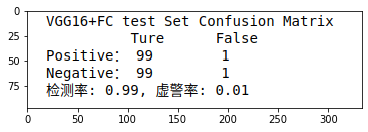

In [12]:
import matplotlib.pyplot as plt
import skimage.io as io
img = io.imread('result/vgg16_fc_test.png') 
plt.imshow(img)
plt.show()

In [ ]:
model_smoke_detector.save('model_smoke_detector_vgg16.h5')

# Test

In [14]:
import numpy as np
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import cv2
from keras.models import load_model
import time

In [2]:
model_smoke_detector = load_model('smoke_detecctor_with_vgg16.h5')

In [3]:
model_vgg16 = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [8]:
cap = cv2.VideoCapture('smoke_video/train-13.avi')
video_writer = cv2.VideoWriter('smoke_detection_output2.avi', cv2.VideoWriter_fourcc(*'MJPG'), 24, (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))))

steps = [5, 150, 500]
#frames = [0] * 30
choice = 0
total_time = 0
count = 0
#num = 1
while True:
    status, img = cap.read()
    #img = img[:, ::-1, :]
    if status:       
        img_detect = cv2.resize(img[:, :, [2, 1, 0]], (224, 224))
        start_time = time.time()
        x = image.img_to_array(img_detect)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature = model_vgg16.predict(x).reshape((1, 7*7*512))
        #print(model_smoke_detector.predict(feature)[0, 0])
        result = model_smoke_detector.predict(feature)[0, 0]
        #detection_results.append(result)
        end_time = time.time()

        total_time += end_time - start_time
        count += 1
                
        img = cv2.flip(img, 1)
        cv2.putText(img,
                    'Probability: {0}'.format(str(result)),
                    (30, 30), 
                    cv2.FONT_HERSHEY_COMPLEX, 
                    1, 
                    (0, 0, 255), 
                    1)
        cv2.putText(img,
                    '{0}'.format('smoke' if result > 0.5 else 'no smoke'),
                    (30, 90), 
                    cv2.FONT_HERSHEY_COMPLEX, 
                    2, 
                    (0, 0, 255), 
                    2)

        cv2.imshow('', img)
        key = cv2.waitKey(steps[choice])
        video_writer.write(img)
        if key == 27:
            break
        elif key == ord('n'):
            choice += 1
            choice %= 3
    else:
        cv2.destroyAllWindows()
        break
cap.release()
video_writer.release()

total_time / count